# Plotting Discrepancies for Kinetic Temperature

In [1]:
import numpy as np
import scipy.stats as sts
from scipy import constants as cnst
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors

In [2]:
fname = r"d:/kananovich/workAppstateBulk/postProcessing/20251015prjUncertPlotUncertainty/inputs/20251002aa_computeDiscrep04_forpap_100_500fps_corr/ptv_results.csv"

In [3]:
#fname = r"e:/appstateBulk/workAppstateBulk/postProcessing/20250925pp_prj_unsrt/input/20250813aa_computeDiscrep04_forpap_100_500fps/ptv_results.csv"

In [4]:
arr_resol = np.arange(1E-6,40E-6,1.6E-7)
arr_framerate = np.arange(30.0, 500.0, 8.0)
arr_discrep_average = np.zeros((len(arr_resol), len(arr_framerate)))
number_of_averaging_iterations = 40
levels_f_contour = np.array([0,10,20,40,80,100,200,500,1000,2100])
#levels_f_contour = np.array([0,10,20,30,40,50,100,5000,10000,20000,40000,50000])
max_lev = np.max(levels_f_contour)

In [5]:
df = pd.read_csv(fname, index_col=0)

In [6]:
df.tail()

,3.000000000e+01,3.200000000e+01,3.400000000e+01,3.600000000e+01,3.800000000e+01,4.000000000e+01,4.200000000e+01,4.400000000e+01,4.600000000e+01,4.800000000e+01,...,4.860000000e+02,4.880000000e+02,4.900000000e+02,4.920000000e+02,4.940000000e+02,4.960000000e+02,4.980000000e+02,5.000000000e+02,5.020000000e+02,5.040000000e+02
resolution,,,,,,,,,,,,,,,,,,,,,
0.00004,6.437224,7.463820,8.552145,9.708096,10.930544,12.222216,13.574967,14.992143,16.484604,18.039221,...,1951.038041,1966.174927,1983.183193,1999.406455,2015.349264,2032.113309,2048.065150,2064.772761,2081.645984,2097.535201
0.00004,6.451961,7.478260,8.570311,9.730708,10.957552,12.246125,13.602549,15.028627,16.518084,18.075003,...,1954.794547,1970.853059,1986.783936,2002.552027,2019.424461,2035.556063,2052.143492,2068.759713,2085.435368,2101.790821
0.00004,6.466243,7.494842,8.588755,9.752210,10.980912,12.272106,13.635144,15.061996,16.552457,18.114117,...,1957.891273,1973.996223,1991.258778,2007.715075,2023.852796,2039.732556,2056.340814,2072.564155,2089.722508,2106.661980
0.00004,6.483641,7.512639,8.606360,9.770215,11.003876,12.301426,13.669427,15.093066,16.591639,18.152612,...,1962.351968,1978.717844,1994.744300,2010.983452,2027.821759,2043.867238,2060.628671,2076.805137,2093.971301,2110.568702
0.00004,6.496941,7.530961,8.627813,9.795265,11.028382,12.322900,13.692356,15.121928,16.628032,18.188104,...,1966.364604,1982.701812,1998.830908,2014.593180,2031.439002,2048.220912,2064.465736,2081.085718,2098.557172,2114.573430


In [7]:
frame_rates = df.columns.astype(float).to_numpy()
resolutions = df.index.to_numpy()
Z = df.to_numpy()

<a list of 8 text.Text objects>

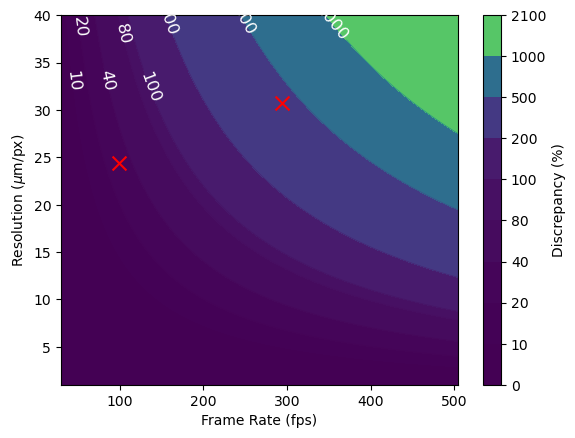

In [8]:
Xf, Yf = np.meshgrid(frame_rates, resolutions * 1000000)


# In[40]:


# Assuming X, Y, arr_discrep_average are already defined
fig5, ax5 = plt.subplots()

# Filled contours
khuj5 = ax5.contourf(Xf, Yf, Z, levels= levels_f_contour, norm=colors.Normalize(vmin=0, vmax=max_lev))

# Add colorbar with customized ticks
cbar5 = plt.colorbar(khuj5, ax=ax5, label='Discrepancy (%)')

# Axis labels
ax5.set_ylabel(r"Resolution ($\mu$m/px)")
ax5.set_xlabel(r"Frame Rate (fps)")

# Experimental points
ax5.scatter([99, 294], [24.39, 30.69], marker='x', color='red', label='Experimental points', s=100)

# Set colorbar limits to enforce end at 400
#cbar.ax.set_ylim(0, 400)

line_contours5 = ax5.contour(Xf, Yf, Z, levels=khuj5.levels, linewidths=0.5,norm=colors.Normalize(vmin=0, vmax=max_lev))

ax5.clabel(
    line_contours5,
    # khuj,
    fmt='%1.0f',
    fontsize=12,
    colors='white',
    inline=True,
    inline_spacing=2,
)